In [3]:
import os
import tqdm
from hydra.experimental import initialize, compose

with initialize(config_path="../experiment/config/"):
    cfg = compose("load_anim.yaml")
print(cfg)
os.chdir('/home/joon/xai/causal/stable-baselines3')

from experiment.handlers import ExperimentHandler
a = ExperimentHandler(cfg)
a.run()

{'experiment_name': 'cartpole_ppo_train', 'env': 'cartpole', 'agents': {'seed': 1938, 'algorithm': 'ppo', 'policy': 'MlpPolicy', 'num_agents': 1, 'load_agent': True, 'save_agent': False, 'do_train': False, 'task_name': 'ppo_train', 'timesteps': 70000, 'save_freq': 10000, 'save_dir': '/home/joon/xai/causal/stable-baselines3/outputs/zero-train-ver-1213/cartpole_agents/', 'env_params': {'start_state_mode': 'gym_wrappers.StartStateMode.DESIGNATED_POSITIONS', 'start_states': [0.0]}}, 'collector_module': 'None', 'test_module': 'None', 'animator_module': 'None'}
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


(None, None)

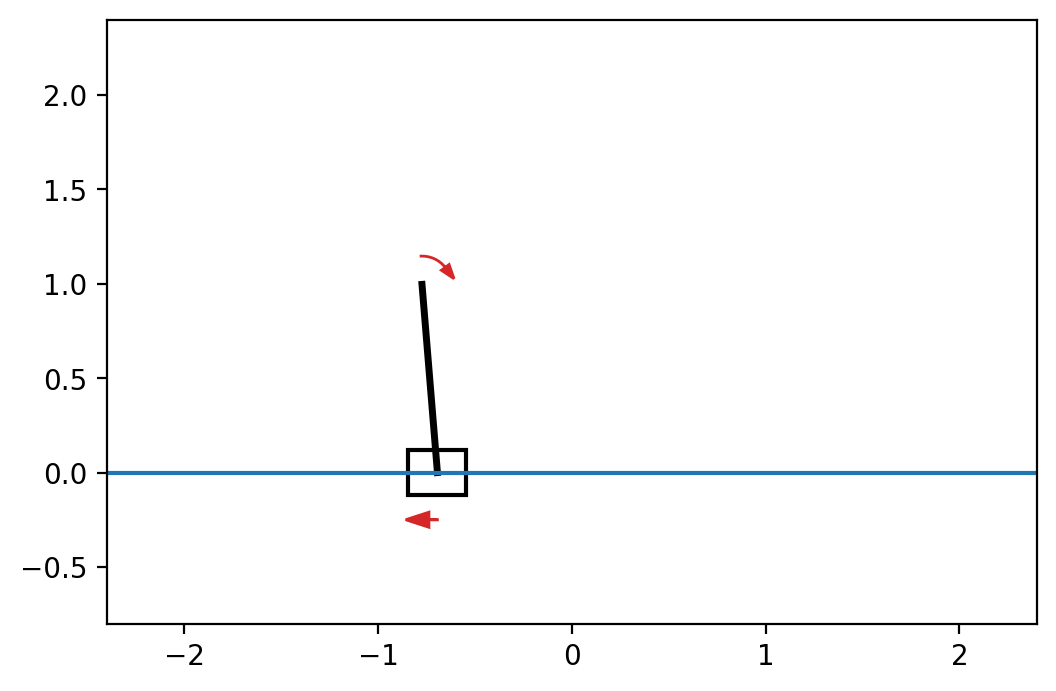

In [5]:
from experiment.animators import Animator
from IPython.display import HTML
from matplotlib import animation
import matplotlib

matplotlib.rcParams['figure.dpi'] = 200
 
anim = Animator()
anim.display_anim(a.agents[0][6], total_steps=200)
#HTML(anim.anim.to_html5_video())

writer=animation.FFMpegWriter(bitrate=500, codec='libx264')
anim.anim.save("anim.mp4", writer=writer)
HTML(anim.anim.to_jshtml())
